# download stock price data from yahoo! finance and display summary

sources:
- https://towardsdatascience.com/a-comprehensive-guide-to-downloading-stock-prices-in-python-2cd93ff821d4

## Load Libraries

In [1]:
import os
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from yahoofinancials import YahooFinancials

## Load Watchlist

In [2]:
data_dir = 'data/'
os.listdir(data_dir)

['.DS_Store', 'my_watchlist.csv']

In [3]:
watchlist = pd.read_csv(data_dir + 'my_watchlist.csv')
print(watchlist.shape)
watchlist

(17, 4)


,industry,nickname,ticker_symbol,remarks
0,gpu,amd,AMD,NaN
1,NaN,nvidia,NVDA,NaN
2,db,mongodb,MDB,NaN
3,NaN,elastic,ESTC,NaN
4,cloud,digitalocean,DOCN,NaN
5,NaN,snowflake,SNOW,NaN
6,NaN,datadog,DDOG,NaN
7,fintech,paypal,PYPL,NaN
8,NaN,fico,FICO,NaN
9,NaN,msci,MSCI,NaN


## Download Stock Price Data

In [4]:
def download_spd(asset):

    # download via YahooFinancials
    yfin = YahooFinancials(asset)
    info = yfin.get_stock_quote_type_data()
    asset_info = info[asset]
    date_today = datetime.today().strftime('%Y-%m-%d')
    data = yfin.get_historical_price_data(start_date='2021-01-01', 
                                          end_date=date_today,
                                          time_interval='daily')

    # info
    addtl_info = {
        'firstTradeDate': data[asset]['firstTradeDate']['formatted_date'],
        'currency': data[asset]['currency'],
        'instrumentType': data[asset]['instrumentType']
    }
    asset_info.update(addtl_info)

    asset_info = pd.Series(asset_info)
    keep_keys = \
    ['symbol',
     'shortName',
     'market',
     'quoteType',
     'exchange',
     'exchangeTimezoneName',
     'exchangeTimezoneShortName'
     ]
    asset_info = asset_info[keep_keys + list(addtl_info.keys())]
    

    # price data
    spd = pd.DataFrame(data[asset]['prices'])
    spd = spd.drop('date', axis=1).set_index('formatted_date')
    
    return asset_info, spd


def plot_spd(asset_info, spd, normalize):
    
    # plot closing prices
    
    plt.figure(figsize=(12, 4))
    if normalize == False:
        plt.plot(spd['adjclose'], lw=2)
    else:
        plt.plot(spd['adjclose'] / spd['adjclose'].max() * 100, lw=2)

    plt.tick_params(axis='x',
                    which='both',
                    bottom=False,
                    top=False,
                    labelbottom=False)
    plt.title('{} | {}:{}'.format(asset_info['shortName'], asset_info['exchange'], asset_info['symbol']),
              weight='bold')
    if normalize == False:
        plt.ylabel(asset_info['currency'], weight='bold')
    else:
        plt.ylabel('% {}'.format(asset_info['currency']), weight='bold')
    
    plt.show()
    return


def market_summary(asset, chart_only=False, normalize=False):
    asset_info, spd = download_spd(asset)
    
    if chart_only == False:
        print('\n\nDownloading stock price data for {}...\n'.format(asset))
        print('Asset Information:')
        display(asset_info)
        print('\nStock Price History:')
    plot_spd(asset_info, spd, normalize)

## See Watchlist Market Summaries




Asset Information:


symbol                                                AMD
shortName                    Advanced Micro Devices, Inc.
market                                          us_market
quoteType                                          EQUITY
exchange                                              NMS
exchangeTimezoneName                     America/New_York
exchangeTimezoneShortName                             EDT
firstTradeDate                                 1980-03-17
currency                                              USD
instrumentType                                     EQUITY
dtype: object


Stock Price History:


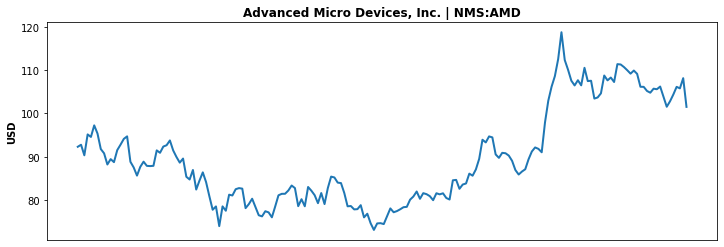




Asset Information:


symbol                                     NVDA
shortName                    NVIDIA Corporation
market                                us_market
quoteType                                EQUITY
exchange                                    NMS
exchangeTimezoneName           America/New_York
exchangeTimezoneShortName                   EDT
firstTradeDate                       1999-01-22
currency                                    USD
instrumentType                           EQUITY
dtype: object


Stock Price History:


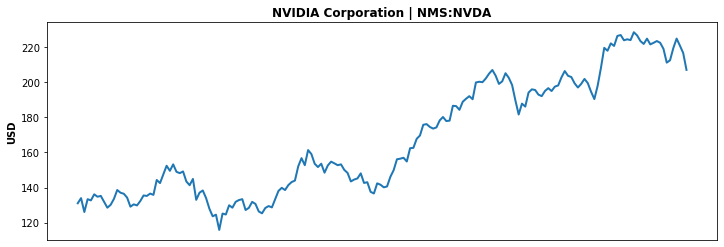




Asset Information:


symbol                                    MDB
shortName                       MongoDB, Inc.
market                              us_market
quoteType                              EQUITY
exchange                                  NGM
exchangeTimezoneName         America/New_York
exchangeTimezoneShortName                 EDT
firstTradeDate                     2017-10-19
currency                                  USD
instrumentType                         EQUITY
dtype: object


Stock Price History:


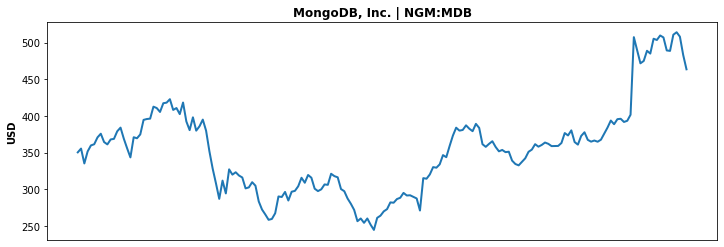




Asset Information:


symbol                                   ESTC
shortName                        Elastic N.V.
market                              us_market
quoteType                              EQUITY
exchange                                  NYQ
exchangeTimezoneName         America/New_York
exchangeTimezoneShortName                 EDT
firstTradeDate                     2018-10-05
currency                                  USD
instrumentType                         EQUITY
dtype: object


Stock Price History:


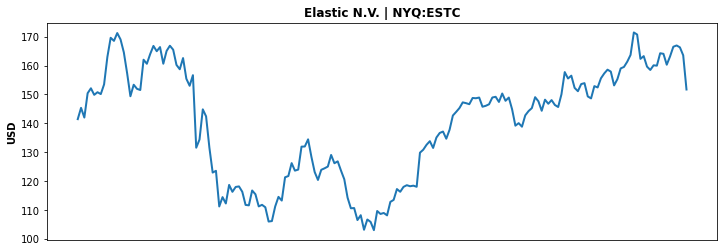




Asset Information:


symbol                                              DOCN
shortName                    DigitalOcean Holdings, Inc.
market                                         us_market
quoteType                                         EQUITY
exchange                                             NYQ
exchangeTimezoneName                    America/New_York
exchangeTimezoneShortName                            EDT
firstTradeDate                                2021-03-24
currency                                             USD
instrumentType                                    EQUITY
dtype: object


Stock Price History:


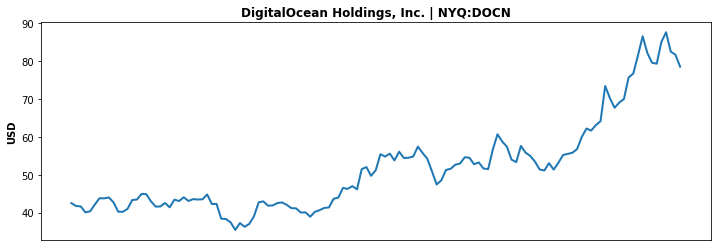




Asset Information:


symbol                                   SNOW
shortName                      Snowflake Inc.
market                              us_market
quoteType                              EQUITY
exchange                                  NYQ
exchangeTimezoneName         America/New_York
exchangeTimezoneShortName                 EDT
firstTradeDate                     2020-09-16
currency                                  USD
instrumentType                         EQUITY
dtype: object


Stock Price History:


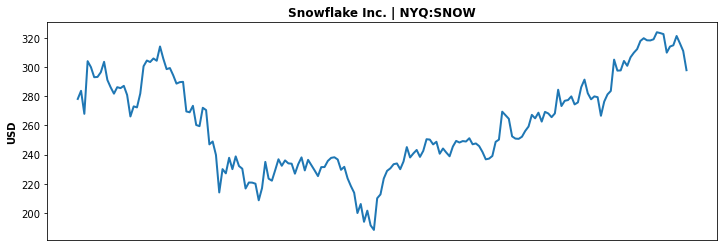




Asset Information:


symbol                                   DDOG
shortName                       Datadog, Inc.
market                              us_market
quoteType                              EQUITY
exchange                                  NMS
exchangeTimezoneName         America/New_York
exchangeTimezoneShortName                 EDT
firstTradeDate                     2019-09-19
currency                                  USD
instrumentType                         EQUITY
dtype: object


Stock Price History:


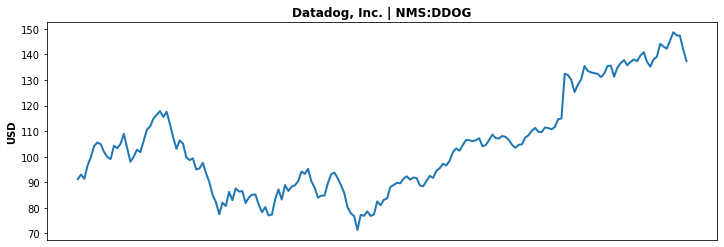




Asset Information:


symbol                                        PYPL
shortName                    PayPal Holdings, Inc.
market                                   us_market
quoteType                                   EQUITY
exchange                                       NMS
exchangeTimezoneName              America/New_York
exchangeTimezoneShortName                      EDT
firstTradeDate                          2015-07-06
currency                                       USD
instrumentType                              EQUITY
dtype: object


Stock Price History:


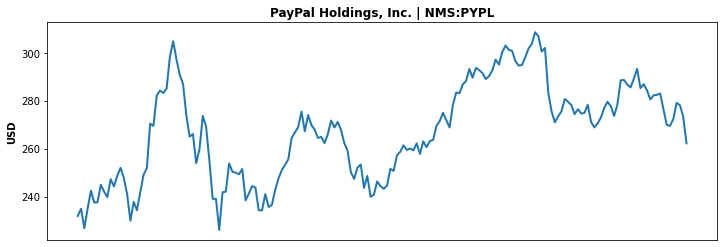




Asset Information:


symbol                                         FICO
shortName                    Fair Isaac Corproation
market                                    us_market
quoteType                                    EQUITY
exchange                                        NYQ
exchangeTimezoneName               America/New_York
exchangeTimezoneShortName                       EDT
firstTradeDate                           1987-07-22
currency                                        USD
instrumentType                               EQUITY
dtype: object


Stock Price History:


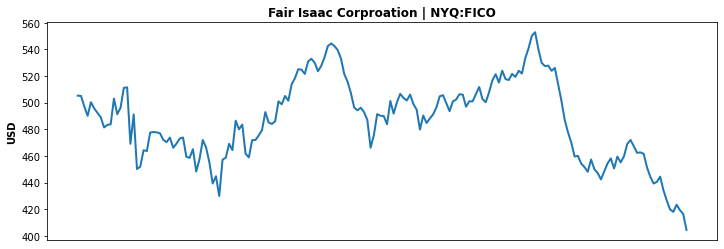




Asset Information:


symbol                                   MSCI
shortName                            MSCI Inc
market                              us_market
quoteType                              EQUITY
exchange                                  NYQ
exchangeTimezoneName         America/New_York
exchangeTimezoneShortName                 EDT
firstTradeDate                     2007-11-15
currency                                  USD
instrumentType                         EQUITY
dtype: object


Stock Price History:


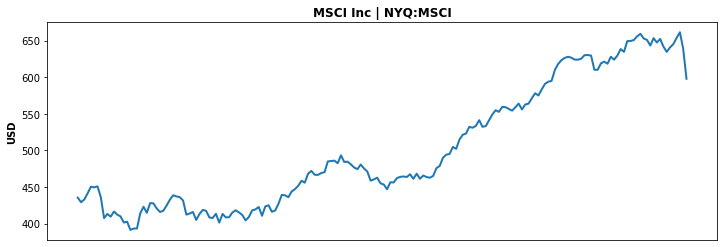




Asset Information:


symbol                                          7832.T
shortName                    BANDAI NAMCO HOLDINGS INC
market                                       jp_market
quoteType                                       EQUITY
exchange                                           JPX
exchangeTimezoneName                        Asia/Tokyo
exchangeTimezoneShortName                          JST
firstTradeDate                              2001-01-01
currency                                           JPY
instrumentType                                  EQUITY
dtype: object


Stock Price History:


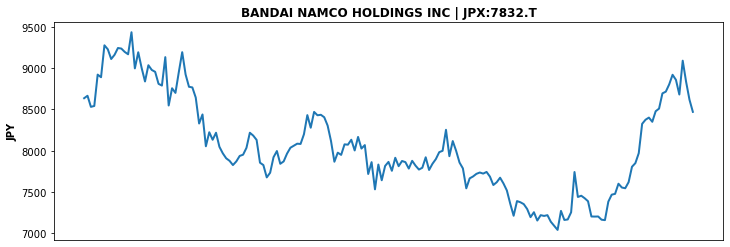




Asset Information:


symbol                                           3635.T
shortName                    KOEI TECMO HOLDINGS CO LTD
market                                        jp_market
quoteType                                        EQUITY
exchange                                            JPX
exchangeTimezoneName                         Asia/Tokyo
exchangeTimezoneShortName                           JST
firstTradeDate                               2001-01-04
currency                                            JPY
instrumentType                                   EQUITY
dtype: object


Stock Price History:


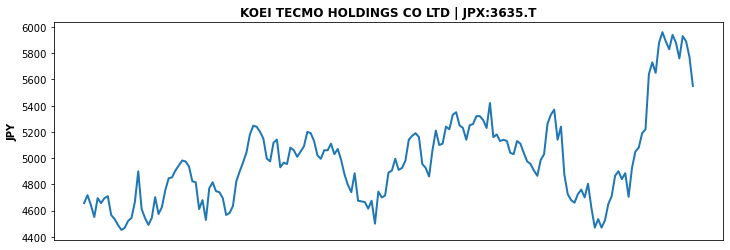




Asset Information:


symbol                                7974.T
shortName                    NINTENDO CO LTD
market                             jp_market
quoteType                             EQUITY
exchange                                 JPX
exchangeTimezoneName              Asia/Tokyo
exchangeTimezoneShortName                JST
firstTradeDate                    2001-01-04
currency                                 JPY
instrumentType                        EQUITY
dtype: object


Stock Price History:


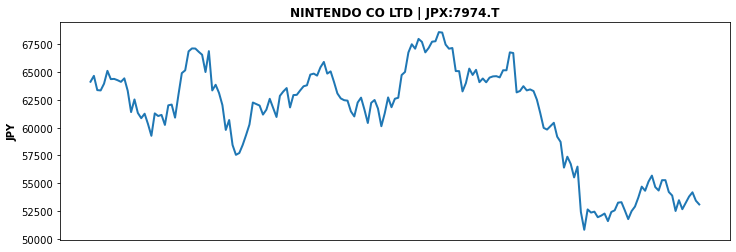




Asset Information:


symbol                              0700.HK
shortName                           TENCENT
market                            hk_market
quoteType                            EQUITY
exchange                                HKG
exchangeTimezoneName         Asia/Hong_Kong
exchangeTimezoneShortName               HKT
firstTradeDate                   2004-06-16
currency                                HKD
instrumentType                       EQUITY
dtype: object


Stock Price History:


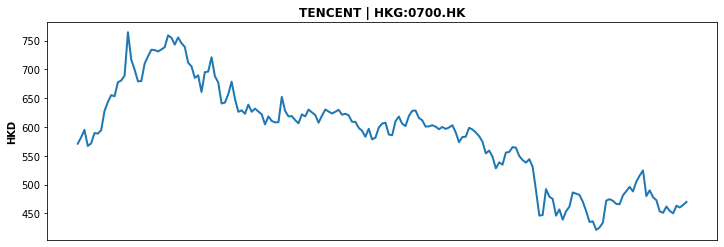




Asset Information:


symbol                                         U
shortName                    Unity Software Inc.
market                                 us_market
quoteType                                 EQUITY
exchange                                     NYQ
exchangeTimezoneName            America/New_York
exchangeTimezoneShortName                    EDT
firstTradeDate                        2020-09-18
currency                                     USD
instrumentType                            EQUITY
dtype: object


Stock Price History:


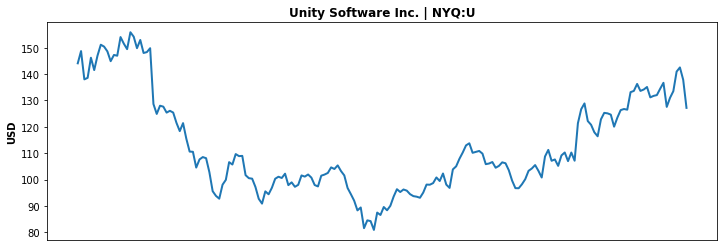




Asset Information:


symbol                                             CRWD
shortName                    CrowdStrike Holdings, Inc.
market                                        us_market
quoteType                                        EQUITY
exchange                                            NMS
exchangeTimezoneName                   America/New_York
exchangeTimezoneShortName                           EDT
firstTradeDate                               2019-06-12
currency                                            USD
instrumentType                                   EQUITY
dtype: object


Stock Price History:


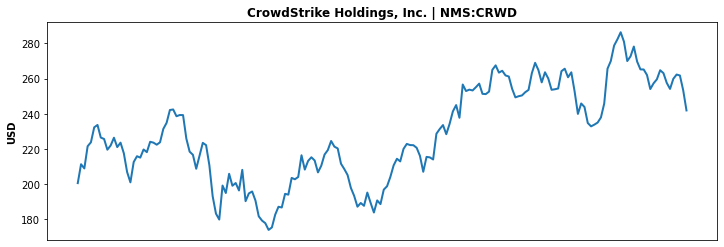




Asset Information:


symbol                                   ABNB
shortName                        Airbnb, Inc.
market                              us_market
quoteType                              EQUITY
exchange                                  NMS
exchangeTimezoneName         America/New_York
exchangeTimezoneShortName                 EDT
firstTradeDate                     2020-12-10
currency                                  USD
instrumentType                         EQUITY
dtype: object


Stock Price History:


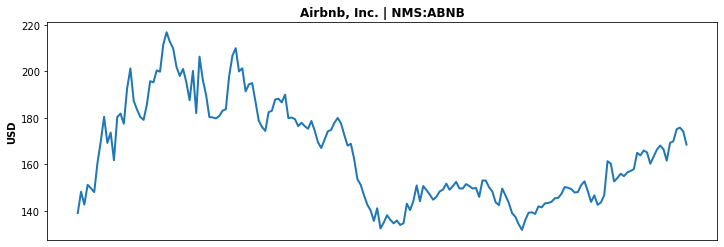

In [5]:
for symbol in [x for x in watchlist['ticker_symbol'] if ':' not in x]:
    market_summary(symbol)

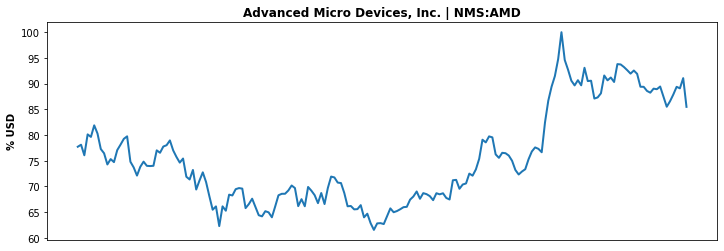

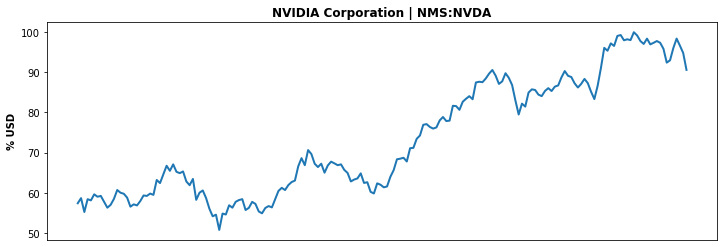

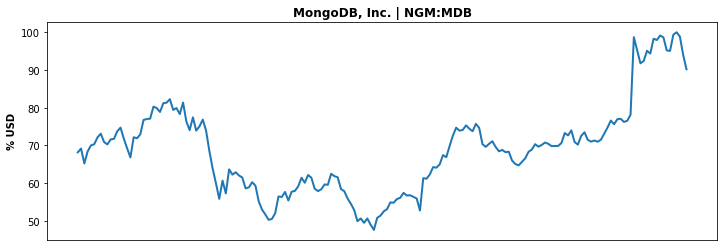

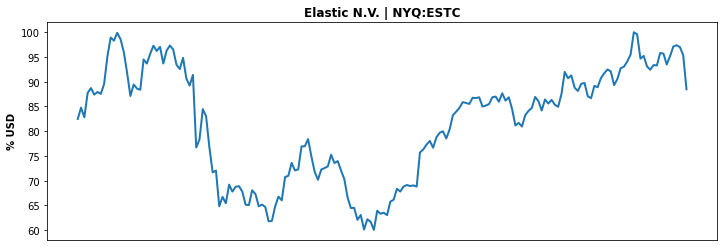

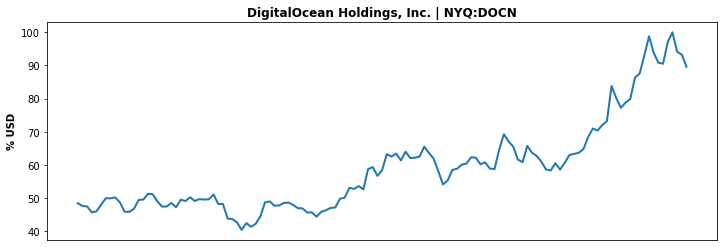

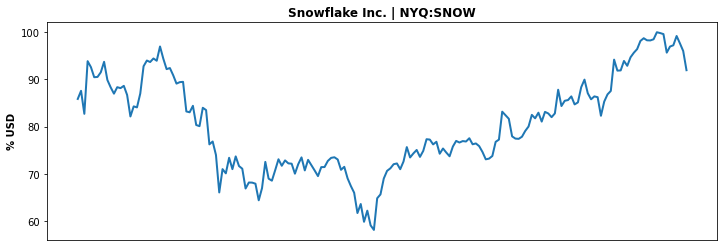

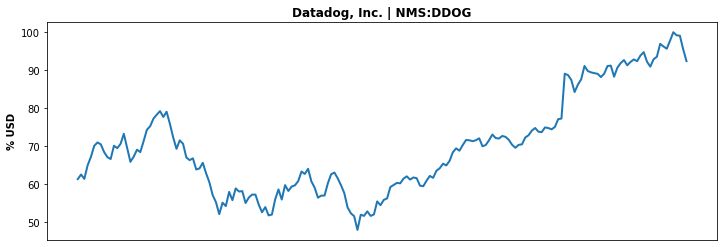

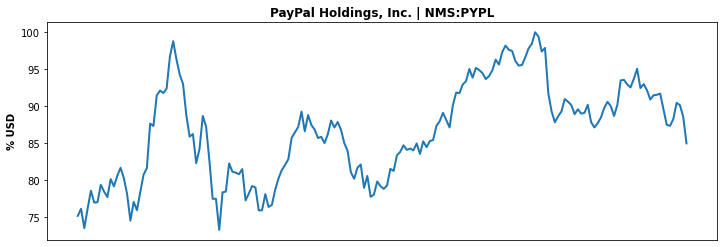

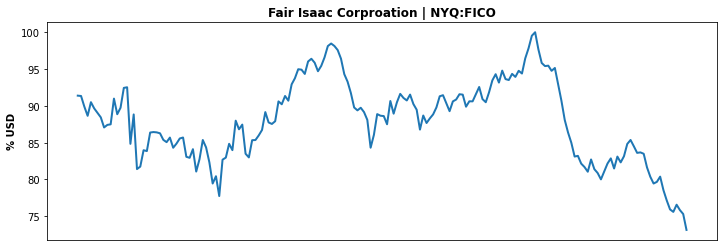

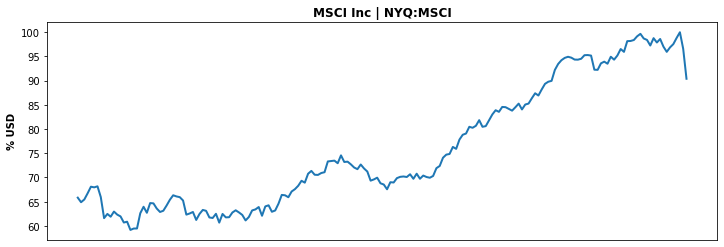

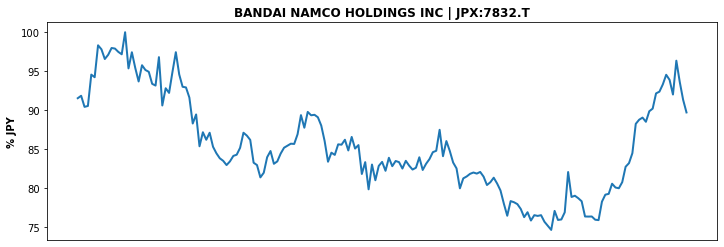

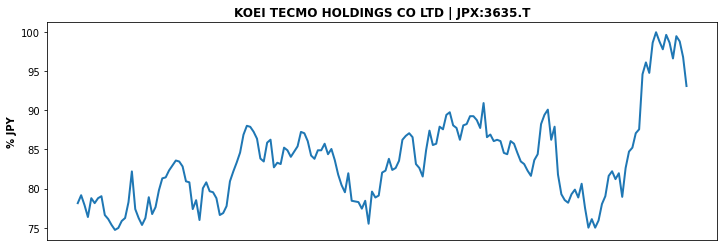

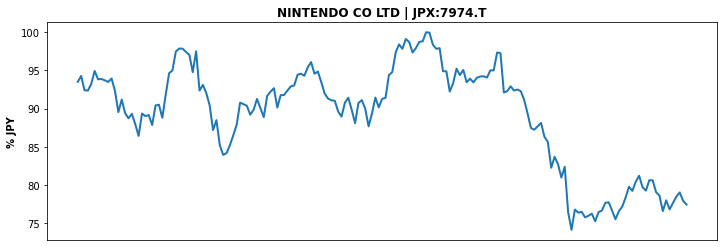

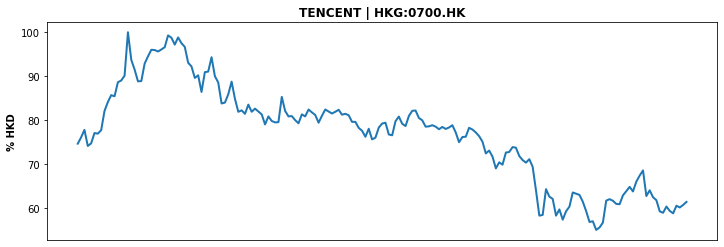

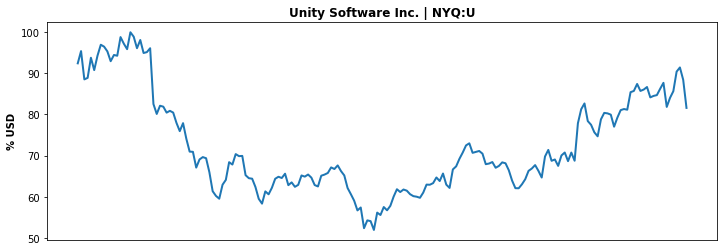

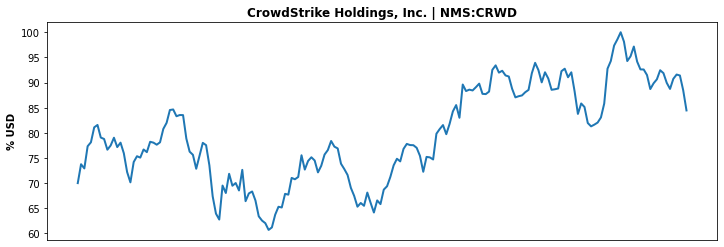

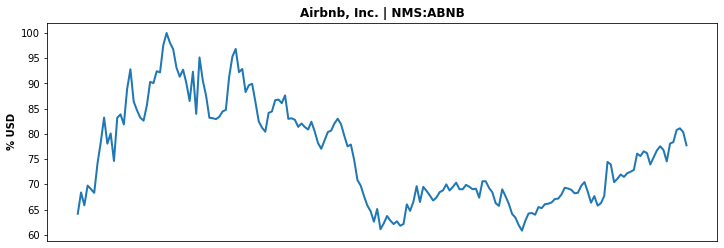

In [6]:
for symbol in [x for x in watchlist['ticker_symbol'] if ':' not in x]:
    market_summary(symbol, 
                   chart_only=True,
                   normalize=True)

## End